In [2]:
import time
import subprocess 

class EHTNetworkHelper:
    """Classe que facilitar a execução do eht-network do ns3"""

    def __init__(self,
                 ns3_path=r"/home/william/ns-3/ns-allinone-3.40/ns-3.40",
                 ):
        self.ns3_path = ns3_path

        self.frequency = 5  # FREQ DO PRIMEIRO LINK (2.4; 5; 6) [padrão = 5]
        self.frequency2 = 0  # FREQ DO SEGUNDO LINK (0 INDICA Q ESTA DESLIGADO) [0]
        self.frequency3 = 0  # FREQ DO TERCEIRO LINK (0 INDICA Q ESTA DESLIGADO) [0]
        self.distance = 1  # DISTANCIA DO STA AO AP EM METROS [padrão = 1]
        self.simulationTime = 0.1  # TEMPO DE SIMULACAO EM SEGUNDOS [10]
        self.udp = 0  # UDP if set to 1, TCP otherwise [true]
        self.downlink = 1  # Generate downlink flows if set to 1, uplink flows otherwise [true]
        self.useRts = 0  # Enable/disable RTS/CTS [false]
        self.useExtendedBlockAck = 0  # Enable/disable use of extended BACK [false]
        self.nStations = 1  # Number of non-AP HE stations [1]
        self.dlAckType = 'NO-OFDMA'  # Ack sequence type for DL OFDMA (NO-OFDMA, ACK-SU-FORMAT, MU-BAR, AGGR-MU-BAR) [NO-OFDMA]
        self.enableUlOfdma = 0  # Enable UL OFDMA (useful if DL OFDMA is enabled and TCP is used) [false]
        self.enableBsrp = 0  # Enable BSRP (useful if DL and UL OFDMA are enabled and TCP is used) [false]
        # muSchedAccessReqInterval =  # Duration of the interval between two requests for channel access made by the MU scheduler [+0fs]
        self.mcs = 11  # if set, limit testing to a specific MCS (0-11) [-1]
        self.payloadSize = 700  # The application payload size in bytes [700]
        # tputInterval =              # duration of intervals for throughput measurement [+0fs]
        self.minExpectedThroughput = 0  # if set, simulation fails if the lowest throughput is below this value [0]
        self.maxExpectedThroughput = 0  # if set, simulation fails if the highest throughput is above this value [0]

    def build_simulation_args(self):
        # argumentos da simulacao
        simulationTime_text = f" --simulationTime={self.simulationTime}"
        frequency_text = f" --frequency={self.frequency}"
        useRts_text = f" --useRts=0"
        minExpectedThroughput_text = " --minExpectedThroughput=6"
        maxExpectedThroughput_text = " --maxExpectedThroughput=550"
        mcs_text = f" --mcs={self.mcs}"

        frequency2_text = f" --frequency2={self.frequency2}"
        frequency3_text = f" --frequency3={self.frequency3}"
        distance_text = f" --distance={self.distance}"
        udp_text = f" --udp={self.udp}"
        downlink_text = f" --downlink={self.downlink}"
        useExtendedBlockAck_text = f" --useExtendedBlockAck={self.useExtendedBlockAck}"
        nStations_text = f" --nStations={self.nStations}"
        dlAckType_text = f" --dlAckType={self.dlAckType}"
        enableUlOfdma_text = f" --enableUlOfdma={self.enableUlOfdma}"
        enableBsrp_text = f" --enableBsrp={self.enableBsrp}"
        # muSchedAccessReqInterval =  # Duration of the interval between two requests for channel access made by the MU scheduler [+0fs]
        payloadSize_text = f" --payloadSize={self.payloadSize}"
        # tputInterval =              # duration of intervals for throughput measurement [+0fs]

        # SETANDO OS PARAMETROS DO OCMANDO DA SIMULACAO
        
        list_of_params = [
            simulationTime_text,
            frequency_text,
            frequency2_text,
            frequency3_text,
            udp_text,
            useRts_text,
            mcs_text,
            distance_text,
            nStations_text,
            dlAckType_text,
            enableUlOfdma_text,
            useExtendedBlockAck_text,
        ]

        if self.frequency2 is not None:
            list_of_params.append(frequency2_text)
        if self.frequency3 is not None:
            list_of_params.append(frequency3_text)
        
        # MONTA O COMANDO DA SIMULACAO COM OS ARGUMENTOS
        simulation_args = f"'wifi-eht-network "
        for param in list_of_params:
            simulation_args += param
        simulation_args += "'"

        return simulation_args

    def run(self, output_file_name="teste"):
        exe_ns3 = "/home/william/ns-3/ns-allinone-3.40/ns-3.40/ns3"
        command = "run"
        simulation_args = self.build_simulation_args()

        # RUN MODE
        result = subprocess.run([exe_ns3, command, simulation_args], capture_output=True)

        self.save_output(result, output_file_name)

        return result

    def test_run(self):
        print("comando:", runner.build_simulation_args())
        print("RODANDO...")
        resultado = runner.run()
        print("RESULTADO \n", resultado.stdout.decode("utf-8"))

    def save_output(self, resultado, output_file_name):
        # SALVA A SAIDA EM UM ARQUIVO
        
        # PEGAR O INSTANTE DE TEMPO PARA N TER NOME DE ARQUIVOS REPETIDOS
        time_millisec = int(round(time.time() * 1000))

        # Defina o caminho completo do arquivo
        caminho = f"resultados_william/{output_file_name}_{time_millisec}.txt"
        print(f"output_f: {caminho}")

        output = resultado.stdout.decode("utf-8")
        linhas = output.splitlines()[2:] # ELIMINA AS 2 PRIMEIRAS LINHAS DA SAIDA
        output_tratado = "\n".join(linhas)

        # Abra o arquivo para escrita
        with open(caminho, "w") as arquivo:
            # Escreva no arquivo
            arquivo.write(output_tratado)

        pass



# TESTES

In [4]:
ns3_path = r"/home/william/ns-3/ns-allinone-3.40/ns-3.40"
%cd $ns3_path

passo_avanco=1
num_simulacoes=10

runner = EHTNetworkHelper()

# DEFINE OS PARAMETROS ESTATICOS DA SIMULACAO

runner.frequency=6 
# runner.frequency2=5 

runner.simulationTime=0.25 
runner.udp=0 
runner.downlink=1 
runner.useRts=0 
runner.nStations=1
runner.enableUlOfdma=1 
runner.enableBsrp=1 
runner.mcs=12 
runner.useExtendedBlockAck=1 
# self.minExpectedThroughput=40 
# self.maxExpectedThroughput=100


for i in range(num_simulacoes):
    metros = 1 + (i*passo_avanco)
    runner.distance = metros

    print(f"distancia: {metros}")
    print("comando:", runner.build_simulation_args())
    
    runner.frequency=6
    runner.frequency2=5
    print("comando:", runner.build_simulation_args())
    print("RODANDO...")
    runner.run(output_file_name=f'/2_link_distance_6_5hz/{runner.frequency}_{runner.frequency2}_dist_{metros}m')

    runner.frequency=6
    runner.frequency2=2.4
    print("comando:", runner.build_simulation_args())
    print("RODANDO...")
    runner.run(output_file_name=f'/2_link_distance_6_24hz/{runner.frequency}_{runner.frequency2}_dist_{metros}m')

    #############################################

    runner.frequency=5
    runner.frequency2=6
    print("comando:", runner.build_simulation_args())
    print("RODANDO...")
    runner.run(output_file_name=f'/2_link_distance_5_6hz/{runner.frequency}_{runner.frequency2}_dist_{metros}m')

    runner.frequency=5
    runner.frequency2=2.4
    print("comando:", runner.build_simulation_args())
    print("RODANDO...")
    runner.run(output_file_name=f'/2_link_distance_5_24hz/{runner.frequency}_{runner.frequency2}_dist_{metros}m')

    #############################################

    runner.frequency=2.4
    runner.frequency2=5
    print("comando:", runner.build_simulation_args())
    print("RODANDO...")
    runner.run(output_file_name=f'/2_link_distance_24_5hz/{runner.frequency}_{runner.frequency2}_dist_{metros}m')

    runner.frequency=2.4
    runner.frequency2=6
    print("comando:", runner.build_simulation_args())
    print("RODANDO...")
    runner.run(output_file_name=f'/2_link_distance_24_6hz/{runner.frequency}_{runner.frequency2}_dist_{metros}m')

    #############################################


/home/william/ns-3/ns-allinone-3.40/ns-3.40
distancia: 1
comando: 'wifi-eht-network  --simulationTime=0.25 --frequency=6 --frequency2=0 --frequency3=0 --udp=0 --useRts=0 --mcs=12 --distance=1 --nStations=1 --dlAckType=NO-OFDMA --enableUlOfdma=1 --useExtendedBlockAck=1 --frequency2=0 --frequency3=0'
comando: 'wifi-eht-network  --simulationTime=0.25 --frequency=6 --frequency2=5 --frequency3=0 --udp=0 --useRts=0 --mcs=12 --distance=1 --nStations=1 --dlAckType=NO-OFDMA --enableUlOfdma=1 --useExtendedBlockAck=1 --frequency2=5 --frequency3=0'
RODANDO...
output_f: resultados_william//2_link_distance_6_5hz/6_5_dist_1m_1717679284113.txt
comando: 'wifi-eht-network  --simulationTime=0.25 --frequency=6 --frequency2=2.4 --frequency3=0 --udp=0 --useRts=0 --mcs=12 --distance=1 --nStations=1 --dlAckType=NO-OFDMA --enableUlOfdma=1 --useExtendedBlockAck=1 --frequency2=2.4 --frequency3=0'
RODANDO...
output_f: resultados_william//2_link_distance_6_24hz/6_2.4_dist_1m_1717679297293.txt
comando: 'wifi-eht-ne

# PLOTS

   Distance  Throughput
0         8       0.000
1         2     327.242
2         4     316.803
3        10       0.000
4         9       0.000
5         5     277.066
6         1     327.242
7         6         NaN
8         3     327.242


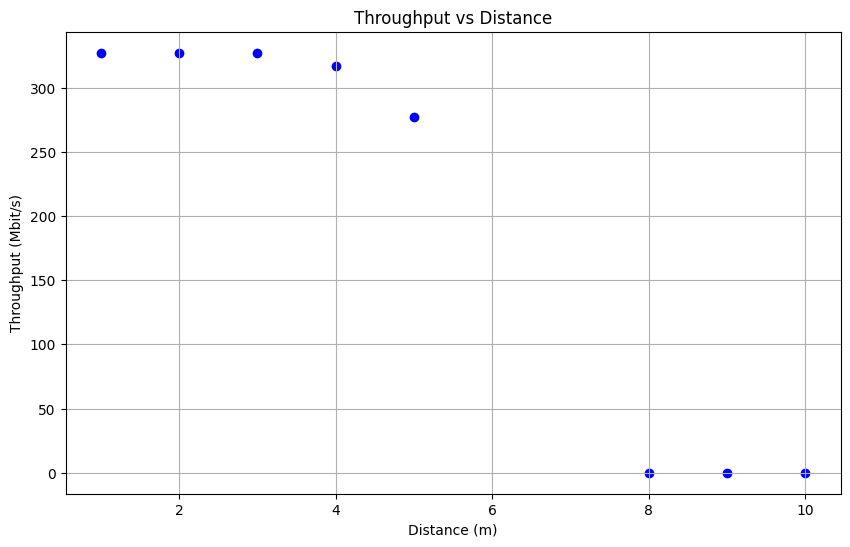

In [11]:
import fileinput
import sys
import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def list_file_n_foldes(dir_dist_path):
    """Lista quais sao as pastas e arquivos de um dado caminho"""
    # LISTA TUDO DENTRO DA PASTA
    arquivos = os.listdir(str(dir_dist_path))
    folders = []
    files = []
    for arquivo in arquivos:
        if os.path.isdir(dir_dist_path + r'/' + arquivo):
            folders.append(dir_dist_path + r'/' + arquivo)
        else:
            files.append(dir_dist_path + r'/' + arquivo)
    return files, folders


# Definir o caminho para o arquivo de texto
# file_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william\stas_25_1716949657016.txt'

# WINDOWS
# folder_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william\1_link_distance_5hz'

# UBUNTU
folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_24_6hz'

banda_filter = 40
gi_filter = 800

files, folders = list_file_n_foldes(folder_path)

num_stas_list = []
tput_list = []
final_data = {'Distance': [], 'Throughput': []}

# Criar um DataFrame a partir dos dados
columns = ['Distance', 'Throughput']
df_final = pd.DataFrame(columns=columns)


for i, file in enumerate(files):

    # PEGA DADOS DO TITULO DO ARQUIVO
    path_names = file.split('/')
    file_name = path_names[-1]
    simulation_title_parts = file_name.split('_')

    frequency = float(simulation_title_parts[0])
    frequency2 = float(simulation_title_parts[1])
    dist = int(simulation_title_parts[3].replace('m', ''))

    # print(file_name)
    # print('freq:', frequency,'freq2:', frequency2, 'dist:', dist)

    file_path = file

    # Ler o arquivo de texto
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # print(f"lines: {len(lines)}")

    # VERIFICA SE A SAIDA DA SIMULACAO ESTA MINIMAMENTE COERENTE, SE N PULA PRA O PROXIMO
    if frequency == 2.4 and len(lines) < 6:
        # print(file)
        # print('QUEBRADO!!!')
        continue
    elif frequency != 2.4 and len(lines) < 13:
        # print(file)
        # print('QUEBRADO!!!')
        continue

    # Processar as linhas para extrair as informações
    data = []
    for line in lines[1:]:  # Pular o cabeçalho

        if 'Command' in line:
            continue
        
        # print(line)
        # RETIRA AS UNIDADES DOS DADOS
        line = line.replace('Mbit/s', '')
        line = line.replace('MHz', '')
        line = line.replace('ns', '')
        # print(line)

        # Dividir a linha por tabulações ou múltiplos espaços
        parts = line.split()
        # print('parts:', parts)

        # # Adicionar os dados à lista
        mcs_value = int(parts[0])
        channel_width = int(parts[1])
        gi = int(parts[2])
        throughput = float(parts[3])

        # ADICIONA OS DADOS
        data.append([mcs_value, channel_width, gi, throughput, frequency, frequency2, dist])

    # Criar um DataFrame a partir dos dados
    columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Distance']
    df = pd.DataFrame(data, columns=columns)

    # print(df)

    # FILTRO
    subset_complex = df[((df['Channel_width'] == banda_filter) & (df['GI'] == gi_filter))]

    # TODO > DESCOBRIR COMO PEGA 1 VALOR ESPECIFICO DO DATA FRAME
    # TODO > POR ENQUANTO TO PASSANDO O MAIOR VALOR DO DF
    tput = subset_complex['Throughput']

    linha_data = {'Distance': dist, 'Throughput': tput.max()}
    final_data['Distance'].append(dist)
    final_data['Throughput'].append(tput.max())

    # print('coletado:', tput)
    # print('data:', linha_data)

print('=====================')

# print(final_data)
df_final = pd.DataFrame(final_data)
print(df_final)

plt.figure(figsize=(10, 6))
plt.scatter(df_final['Distance'], df_final['Throughput'], color='b', marker='o')
plt.title('Throughput vs Distance')
plt.xlabel('Distance (m)')
plt.ylabel('Throughput (Mbit/s)')
plt.grid(True)
plt.show()



In [1]:
import fileinput
import sys
import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def list_file_n_foldes(dir_dist_path):
    """Lista quais sao as pastas e arquivos de um dado caminho"""
    # LISTA TUDO DENTRO DA PASTA
    arquivos = os.listdir(str(dir_dist_path))
    folders = []
    files = []
    for arquivo in arquivos:
        if os.path.isdir(dir_dist_path + r'/' + arquivo):
            folders.append(dir_dist_path + r'/' + arquivo)
        else:
            files.append(dir_dist_path + r'/' + arquivo)
    return files, folders

# WINDOWS
# folder_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william'

# UBUNTU
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_6_24hz'
folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william'

banda_filter = 40
gi_filter = 800

files, folders = list_file_n_foldes(folder_path)

columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Distance']
all_data = pd.DataFrame(columns=columns)
print(all_data)

for folder in folders:
    folder_name = folder.split('/')[-1]
    print(folder_name)

    n_links = int(folder_name.split('_')[0])
    type_sim = folder_name.split('_')[2]
    freq1 = folder_name.split('_')[3].split('hz')[0]
    if n_links > 1:
        freq2 = folder_name.split('_')[4].split('hz')[0]
    else:
        freq2 = None
    print(f"n_links: {n_links}, type_sim: {type_sim}, freq1: {freq1}, freq2: {freq2}")

    if n_links == 2:
        sim_files, sub_folders = list_file_n_foldes(folder)
        print(f"sim_files: {sim_files}")
        for i, file_t in enumerate(sim_files):

            # PEGA DADOS DO TITULO DO ARQUIVO
            path_names = file_t.split('/')
            file_name = path_names[-1]
            simulation_title_parts = file_name.split('_')

            frequency = float(simulation_title_parts[0])
            frequency2 = float(simulation_title_parts[1])
            dist = int(simulation_title_parts[3].replace('m', ''))

            file_path = file_t
            print(f"file_path: {file_path}")

            # Ler o arquivo de texto
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()

            print(f"lines: {len(lines)}")

            # VERIFICA SE A SAIDA DA SIMULACAO ESTA MINIMAMENTE COERENTE, SE N PULA PRA O PROXIMO
            if frequency == 2.4 and len(lines) < 6:
                # print(file)
                # print('QUEBRADO!!!')
                continue
            elif frequency != 2.4 and len(lines) < 13:
                # print(file)
                # print('QUEBRADO!!!')
                continue

            # Processar as linhas para extrair as informações
            data = []
            for line in lines[1:]:  # Pular o cabeçalho

                if 'Command' in line:
                    continue

                # print(line)
                # RETIRA AS UNIDADES DOS DADOS
                line = line.replace('Mbit/s', '')
                line = line.replace('MHz', '')
                line = line.replace('ns', '')
                # print(line)

                # Dividir a linha por tabulações ou múltiplos espaços
                parts = line.split()
                # print('parts:', parts)

                # # Adicionar os dados à lista
                mcs_value = int(parts[0])
                channel_width = int(parts[1])
                gi = int(parts[2])
                throughput = float(parts[3])

                # ADICIONA OS DADOS
                data.append([mcs_value, channel_width, gi, throughput, frequency, frequency2, dist])

            # Criar um DataFrame a partir dos dados
            columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Distance']
            df = pd.DataFrame(data, columns=columns)

            # print(df)
            all_data = pd.concat([all_data, df], ignore_index=True)

            # FILTRO
            subset_complex = df[((df['Channel_width'] == banda_filter) & (df['GI'] == gi_filter))]

            # TODO > DESCOBRIR COMO PEGA 1 VALOR ESPECIFICO DO DATA FRAME
            # TODO > POR ENQUANTO TO PASSANDO O MAIOR VALOR DO DF
            tput = subset_complex['Throughput']

            # linha_data = {'Distance': dist, 'Throughput': tput.max()}

print("all_data")
print(all_data)


Empty DataFrame
Columns: [MCS, Channel_width, GI, Throughput, Frequency, Frequency2, Distance]
Index: []
1_link_distance_5hz
n_links: 1, type_sim: distance, freq1: 5, freq2: None
1_link_distance_24hz
n_links: 1, type_sim: distance, freq1: 24, freq2: None
1_link_distance_6hz
n_links: 1, type_sim: distance, freq1: 6, freq2: None
2_link_distance_24_6hz
n_links: 2, type_sim: distance, freq1: 24, freq2: 6
sim_files: ['/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_24_6hz/2.4_6_dist_7m_1717679981280.txt', '/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_24_6hz/2.4_6_dist_8m_1717680024367.txt', '/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_24_6hz/2.4_6_dist_2m_1717679554988.txt', '/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_24_6hz/2.4_6_dist_4m_1717679806129.txt', '/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_24_6hz/2.4_6_dist_10

In [10]:
all_data.columns.values

array(['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency',
       'Frequency2', 'Distance'], dtype=object)

In [11]:
all_data.columns

Index(['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2',
       'Distance'],
      dtype='object')

In [3]:
teste1 = all_data.where((all_data.Frequency == 2.4) & (all_data.Frequency2 == 6.0))
teste1 = teste1.dropna(how='any')    #to drop if all values in the row are nan
print(teste1)

   MCS Channel_width    GI  Throughput  Frequency  Frequency2 Distance
0   12            20  3200      0.0000        2.4         6.0        8
1   12            20  1600      0.0000        2.4         6.0        8
2   12            20   800      0.0000        2.4         6.0        8
3   12            40  3200      0.0000        2.4         6.0        8
4   12            40  1600      0.0000        2.4         6.0        8
5   12            40   800      0.0000        2.4         6.0        8
6   12            20  3200    165.2900        2.4         6.0        2
7   12            20  1600    167.5740        2.4         6.0        2
8   12            20   800    179.0660        2.4         6.0        2
9   12            40  3200    292.0290        2.4         6.0        2
10  12            40  1600    291.4460        2.4         6.0        2
11  12            40   800    327.2420        2.4         6.0        2
12  12            20  3200    165.2900        2.4         6.0        4
13  12